## Importing libraries

In [4]:
import pandas as pd   
import numpy as np  
import seaborn as sns  
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

## Importing data 

In [5]:
data_income = pd.read_csv('income.csv')

In [6]:
data = data_income.copy()

## Exploratory Data Analysis

### Getting to know the Data

In [7]:
data.info

<bound method DataFrame.info of        age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White   

In [8]:
#checking for missing values
data.isnull() 

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [10]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [11]:
data.describe(include="O") #summary of categorical variable

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [12]:
data['JobType'].value_counts() #frequency of each category

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [13]:
data['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [14]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [15]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

### Read the data by including "na_values['?']" to consider ? as nan

In [16]:
data = pd.read_csv('income.csv', na_values = [" ?"])

In [17]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [18]:
missing = data[data.isnull().any(axis=1)]

In [19]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [20]:
data1 = data.dropna(axis=0)  #drop rows with missing values

In [21]:
data1.corr(numeric_only= True)

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [22]:
data1.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [23]:
#Gender proportion table
pd.crosstab(index=data1["gender"], columns='count', normalize=True)

col_0,count
gender,
Female,0.324315
Male,0.675685


In [24]:
#gender vs salary status
pd.crosstab(index= data1["gender"], columns = data1["SalStat"], margins = True, normalize= 'index')

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


<Axes: xlabel='count', ylabel='SalStat'>

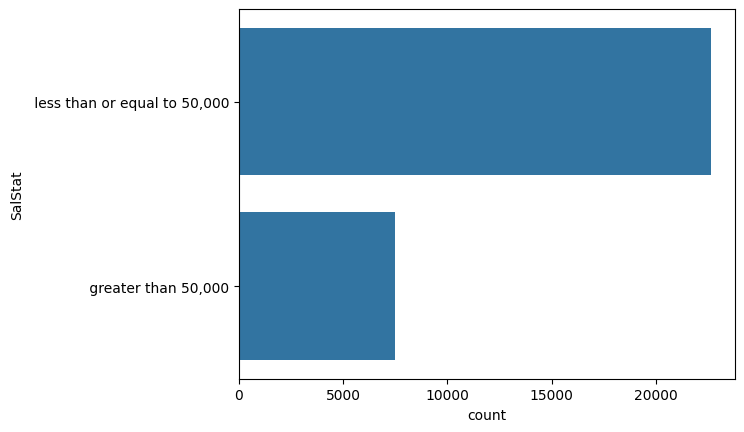

In [25]:
#frequency distribution of salary status
sns.countplot(data1['SalStat'])

##### 75% of people salary status is <= 50,000
##### 25% of people salary status is > 50,000

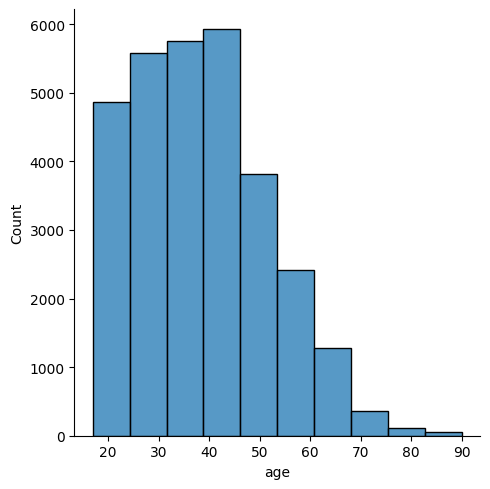

In [26]:
#hitogram of age
sns.displot(data1['age'], bins= 10, kde=False)

#### People with age 20-40 are high in frequency

## Age vs Salary Status

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

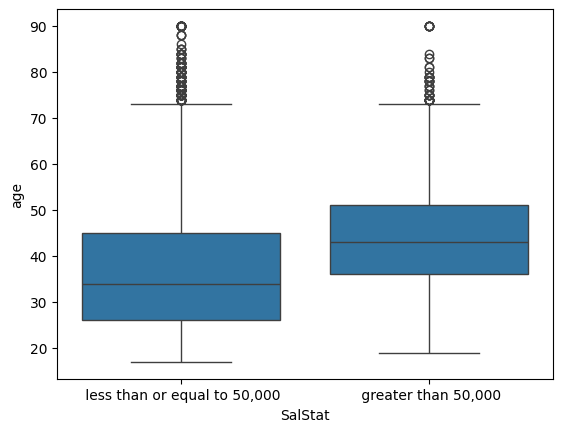

In [27]:
sns.boxplot(x='SalStat',y= 'age', data=data1)
data1.groupby('SalStat')['age'].median()

#### People with age 35-50 are more likely to earn > 50,000
#### People with age 25-35 are more likely to earn <= 50,000

## Job Type vs Salary Status

<Axes: xlabel='count', ylabel='JobType'>

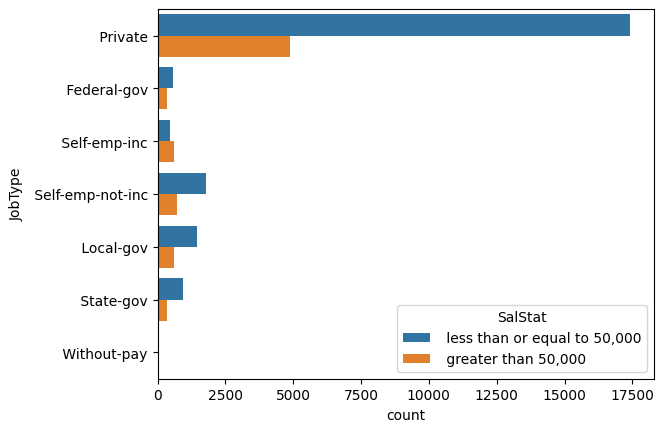

In [28]:
sns.countplot(y="JobType", hue= 'SalStat', data=data1)

In [29]:
pd.crosstab(index= data1["JobType"], columns = data1["SalStat"],margins =True,normalize= 'index').round(4)*100

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.71,61.29
Local-gov,29.46,70.54
Private,21.88,78.12
Self-emp-inc,55.87,44.13
Self-emp-not-inc,28.57,71.43
State-gov,26.90,73.10
Without-pay,0.00,100.00
All,24.89,75.11


#### 56% of self employed people earn more then 50k per year

## Education vs Salary Status

<Axes: xlabel='count', ylabel='EdType'>

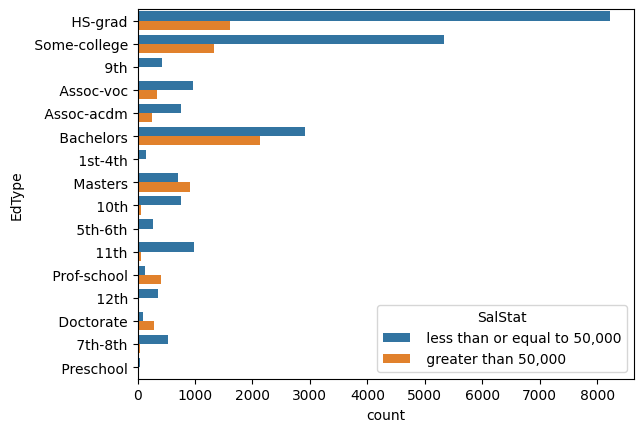

In [30]:
sns.countplot(y="EdType", hue= 'SalStat', data=data1)

In [31]:
pd.crosstab(index= data1["EdType"], columns = data1["SalStat"],margins =True,normalize= 'index').round(4)*100

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.20,92.80
11th,5.63,94.37
12th,7.69,92.31
1st-4th,3.97,96.03
5th-6th,4.17,95.83
7th-8th,6.28,93.72
9th,5.49,94.51
Assoc-acdm,25.40,74.60
Assoc-voc,26.32,73.68


#### People who have done Doctrate, Masters and prof-school are more likely to earn more than 50k compared to the others

## Occupation vs Salary Status

<Axes: xlabel='count', ylabel='occupation'>

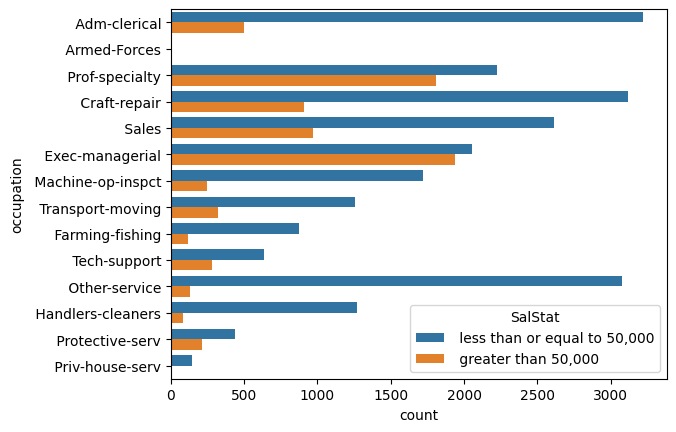

In [32]:
sns.countplot(y="occupation", hue= 'SalStat', data=data1)

In [33]:
pd.crosstab(index= data1["occupation"], columns = data1["SalStat"],margins =True,normalize= 'index').round(4)*100

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.38,86.62
Armed-Forces,11.11,88.89
Craft-repair,22.53,77.47
Exec-managerial,48.52,51.48
Farming-fishing,11.63,88.37
Handlers-cleaners,6.15,93.85
Machine-op-inspct,12.46,87.54
Other-service,4.11,95.89
Priv-house-serv,0.70,99.30


#### Those who make more than 50K are likely to work as managers and prof

In [34]:
data1.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

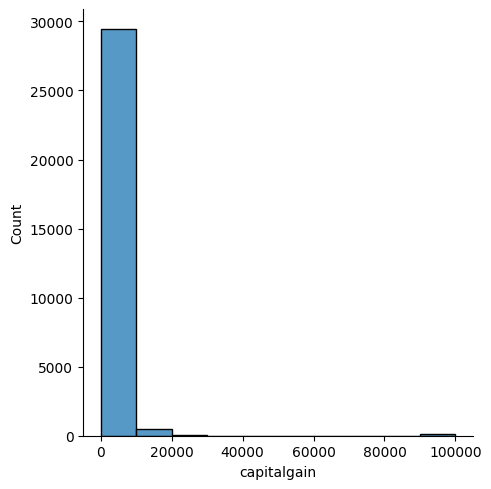

In [35]:
sns.displot(data1['capitalgain'], bins= 10, kde=False)

#### 92% of Capital Gain is 0

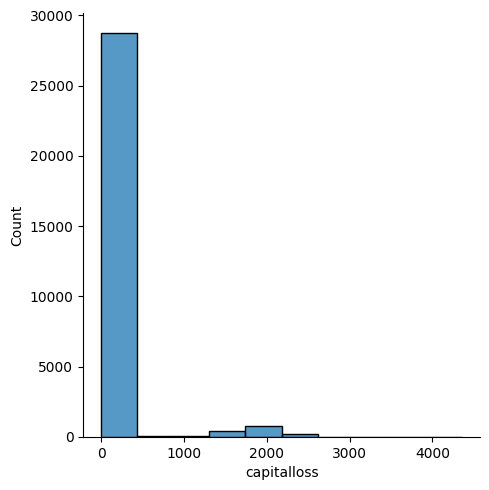

In [36]:
sns.displot(data1['capitalloss'], bins= 10, kde=False)

#### 95% of Capital loss is 0

In [37]:
#data2['SalStat'] = data2['SalStat'].map({'less than or equal to 50,000':0, 'greater then 50,000':1})
data1.loc[:, 'SalStat'] = data1['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})

In [38]:
data1

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


#### convert categrical variable to dummy variable

In [39]:
new_data = pd.get_dummies(data1,drop_first=True, dtype=int)

In [40]:
new_data

,age,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,SalStat_1
0,45,0,0,28,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,27,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31974,34,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31975,23,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31976,42,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
#storing columns names
column_list = list(new_data.columns)
print(column_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occu

In [42]:
#seperating input names from data
features = list(set(column_list)-set(['SalStat']))
print(features)

['occupation_ Handlers-cleaners', 'relationship_ Unmarried', 'nativecountry_ Haiti', 'nativecountry_ Greece', 'nativecountry_ Poland', 'nativecountry_ Hungary', 'JobType_ Self-emp-not-inc', 'nativecountry_ Peru', 'nativecountry_ Philippines', 'relationship_ Other-relative', 'race_ White', 'EdType_ 12th', 'nativecountry_ Taiwan', 'EdType_ Assoc-voc', 'race_ Black', 'nativecountry_ Dominican-Republic', 'occupation_ Other-service', 'nativecountry_ Cuba', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Married-civ-spouse', 'occupation_ Priv-house-serv', 'nativecountry_ Germany', 'nativecountry_ Ecuador', 'nativecountry_ Thailand', 'nativecountry_ India', 'nativecountry_ Portugal', 'occupation_ Craft-repair', 'nativecountry_ Vietnam', 'hoursperweek', 'nativecountry_ Nicaragua', 'occupation_ Prof-specialty', 'age', 'EdType_ Some-college', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ Iran', 'nativecountry_ Hong', 'nativecountry_ Laos', 'maritalstatus_ Separated', 'SalS

In [43]:
#storing the output value in y
y = new_data['SalStat_1'].values
print(y)

[0 0 1 ... 0 0 0]


In [44]:
#storing the value from input feature
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Train Test split

In [45]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25)

## Modeling

#### Logistic Regression

In [47]:
logistic = LogisticRegression(max_iter = 200)

In [48]:
xt, xv, yt, yv = train_test_split(train_x, train_y, test_size=0.25)

In [49]:
logistic.fit(xt, yt)

C:\Users\sspoo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [50]:
#logistic.coef_

In [51]:
logistic.intercept_

array([-2.87710116])

In [52]:
prediction = logistic.predict(xv)
print(prediction)

[1 0 0 ... 0 0 1]


In [53]:
np.mean(prediction == yv)

1.0

In [54]:
logistic.score(xv,yv)

1.0

In [55]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (yv != prediction).sum())

Misclassified samples: 0
